## Implementation

Use of Neural Network for Solving Ordinary Differential Equation. For this reason, we will also choose a simply ODE:

$$u'= x$$
$$u(0)=1$$

We can easily solve this problem by integrating both sides of the solution, leading to $u + C = x^2/2 +C$, and after fitting $C$ to obey the initial condition
we have $u = x^2/2 + 1$. Nevertheless, instead of solving it analytically, let's try to solve using Neural Nets.

$$u'= x$$
$$ \int u' \,dx = \int x \,dx $$
$$ u + C_1 = x^2/2 + C_2 $$
$$ u = x^2/2 + C$$

### Define Variables

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# initial condition
f0 = 1
# infinitesimal small number
inf_s = np.sqrt(np.finfo(np.float32).eps)

# Parameters
learning_rate = 0.01
training_steps = 1000
batch_size = 100
display_step = training_steps/10

# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_output]))
}

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [3]:
# Create model
def multilayer_perceptron(x):
    x = np.array([[[x]]],  dtype='float32')
    # Hidden fully connected layer with 32 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden fully connected layer with 32 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Output fully connected layer
    output = tf.matmul(layer_2, weights['out']) + biases['out']
    return tf.nn.sigmoid(output)

# Universal Approximator
def g(x):
    return x * multilayer_perceptron(x) + f0

# Given EDO
def f(x):
    return x
    
# Custom loss function to approximate the derivatives
def custom_loss():
    summation = []
    for x in np.linspace(0,1,50):
        dNN = (g(x+inf_s)-g(x))/inf_s
        summation.append((dNN - f(x))**2)
    return tf.reduce_sum(tf.abs(summation))
    # return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

In [4]:
def train_step():
    with tf.GradientTape() as tape:
        loss = custom_loss()
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [5]:
for i in range(training_steps):
    train_step()
    if i % display_step == 0:
        print("loss: %f " % (custom_loss()))

loss: 11.155112 
loss: 0.335660 
loss: 0.152854 
loss: 0.094964 
loss: 0.069593 
loss: 0.055662 
loss: 0.043532 
loss: 0.037262 
loss: 0.032830 
loss: 0.029838 


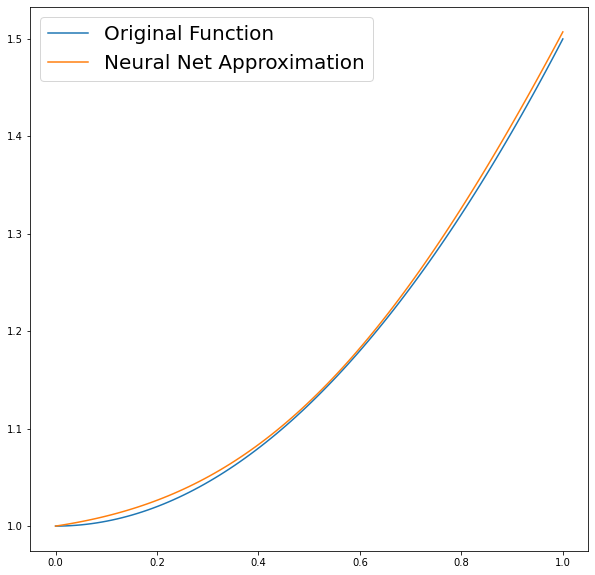

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(10,10))
# True Solution (found analitically)
def true_solution(x):
    return (x**2)/2 + 1

X = np.linspace(0, 1, 100)
result = []
for i in X:
  # result.append(f(i))
  result.append(g(i).numpy()[0][0][0])

S = true_solution(X)
  
plt.plot(X, S, label="Original Function")
plt.plot(X, result, label="Neural Net Approximation")
plt.legend(loc=2, prop={'size': 20})
plt.show()